In [36]:
# Open a result file to store extract in
result_file = open("sparse_sample.csv",'w')
# Open the full dataset to read from
with open("Full_Chicago_Rideshare_data.csv", "r") as f:
    data = []
    line_count = 0
    first_line = True
    lines_read = 0
    #max_lines = 100000
    for line in f: 
        #if lines_read >= max_lines:
        #    break
        # If reading the first line (header line) of the file, write it as header of new file
        if first_line == True:
            # Write header line
            result_file.write(line)
            first_line = False
        #count += 1
        # Downsampling by a factor of 500 (randomly selecting records with a probability of 1/500)
        # This is with the target of generating a sample of ~100k records that spans the full date range
        random_choice = np.random.choice([0, 1], p=[499/500, 1/500])
        if random_choice == 1:
            result_file.write(line)
            line_count += 1
            #totlines += 1
            #count = 0
print(line_count, 'records written to file.')        
result_file.close()

90397 records written to file.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('sparse_sample.csv', parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

In [3]:
df_random = df.sample(5000)


In [4]:
df_random.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
12576,ef2d720efb4a48700b8a78f6767caccf7e27cdc0,2018-11-29 06:45:00,2018-11-29 07:45:00,3551.0,18.2,1.703108e+10,NaN,8.0,NaN,32.5,...,2.50,35.00,False,1,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),NaN,NaN,NaN
62779,a87fb91c811cc4e62e3be8d17f89d688fa18b5d1,2018-11-12 00:30:00,2018-11-12 00:30:00,517.0,2.3,NaN,NaN,6.0,6.0,5.0,...,2.50,7.50,False,1,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
4749,8245101b9c5f60ddcc376c7980aec564c6d1d2e4,2018-12-22 21:45:00,2018-12-22 22:00:00,794.0,3.4,1.703106e+10,1.703184e+10,6.0,8.0,7.5,...,2.50,10.00,False,1,41.934762,-87.639854,POINT (-87.6398538587 41.9347624564),41.904935,-87.649907,POINT (-87.6499072264 41.9049353016)
68422,bdb62e7a88cb0692239f623b595eb8b4c845400a,2019-02-21 18:00:00,2019-02-21 18:15:00,719.0,2.1,1.703184e+10,1.703129e+10,29.0,29.0,7.5,...,2.55,10.05,False,1,41.863787,-87.692516,POINT (-87.6925159284 41.8637871234),41.855104,-87.732245,POINT (-87.7322454045 41.8551039667)
49366,75a0944c62bd79873d331323b396c3332e4df830,2018-12-19 01:30:00,2018-12-19 01:45:00,1035.0,5.0,NaN,NaN,28.0,8.0,10.0,...,0.00,10.00,True,2,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)


In [5]:
df = df_random.copy()

In [6]:
df['Trip Start Timestamp'].min(), df['Trip Start Timestamp'].max()

(Timestamp('2018-11-01 06:30:00'), Timestamp('2019-03-31 21:00:00'))

In [7]:
df.sort_values(by=['Trip Start Timestamp', 'Trip End Timestamp'], inplace=True)

In [8]:
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
10618,d460b3fe93c2e2aa469eb9ca8241ca248b87a2b2,2018-11-01 06:30:00,2018-11-01 07:30:00,2929.0,16.1,1.703150e+10,1.703184e+10,50.0,32.0,10.0,...,2.5,12.5,True,3,41.714675,-87.594933,POINT (-87.5949330919 41.7146749464),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
5302,89e57c5ac62acf2030f15511479634f1e8f4fd16,2018-11-01 07:00:00,2018-11-01 07:45:00,3133.0,22.9,1.703105e+10,NaN,5.0,NaN,35.0,...,2.5,37.5,False,1,41.944947,-87.685778,POINT (-87.6857782135 41.9449467539),NaN,NaN,NaN
12096,e893d75b0e82e17d23836ef05f04d12746132202,2018-11-01 07:30:00,2018-11-01 08:15:00,2102.0,9.3,1.703103e+10,1.703128e+10,3.0,28.0,20.0,...,2.5,22.5,False,1,41.972668,-87.663865,POINT (-87.6638654956 41.9726679555),41.885300,-87.642808,POINT (-87.6428084655 41.8853000224)
60726,a0682137da78e3307d8bd758c4393f6ed42483c2,2018-11-01 08:30:00,2018-11-01 08:30:00,428.0,1.4,NaN,NaN,20.0,15.0,7.5,...,0.0,7.5,True,1,41.924347,-87.734740,POINT (-87.7347397536 41.9243470769),41.954028,-87.763399,POINT (-87.7633990316 41.9540276487)
86850,0e453764990aaed6cce66c74b24c2f90b6528aa9,2018-11-01 08:30:00,2018-11-01 08:45:00,575.0,1.1,1.703108e+10,1.703184e+10,8.0,32.0,5.0,...,2.5,7.5,False,1,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [9]:
#start_date = pd.Timestamp(2018, 12, 21, 0)
#end_date = pd.Timestamp(2019, 1, 4, 0)

In [10]:
#df2 = df[df['Trip Start Timestamp'] > start_date]# & df['Trip Start Timestamp'] < end_date]
#df3 = df2[df2['Trip Start Timestamp'] < end_date]
#df3 = df3[df3['Trip Seconds'] != 0]
#df3 = df[df['Trip Seconds'] != 0]
df3 = df[df['Trip Seconds'] != 0]
df3.head()


,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
10618,d460b3fe93c2e2aa469eb9ca8241ca248b87a2b2,2018-11-01 06:30:00,2018-11-01 07:30:00,2929.0,16.1,1.703150e+10,1.703184e+10,50.0,32.0,10.0,...,2.5,12.5,True,3,41.714675,-87.594933,POINT (-87.5949330919 41.7146749464),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
5302,89e57c5ac62acf2030f15511479634f1e8f4fd16,2018-11-01 07:00:00,2018-11-01 07:45:00,3133.0,22.9,1.703105e+10,NaN,5.0,NaN,35.0,...,2.5,37.5,False,1,41.944947,-87.685778,POINT (-87.6857782135 41.9449467539),NaN,NaN,NaN
12096,e893d75b0e82e17d23836ef05f04d12746132202,2018-11-01 07:30:00,2018-11-01 08:15:00,2102.0,9.3,1.703103e+10,1.703128e+10,3.0,28.0,20.0,...,2.5,22.5,False,1,41.972668,-87.663865,POINT (-87.6638654956 41.9726679555),41.885300,-87.642808,POINT (-87.6428084655 41.8853000224)
60726,a0682137da78e3307d8bd758c4393f6ed42483c2,2018-11-01 08:30:00,2018-11-01 08:30:00,428.0,1.4,NaN,NaN,20.0,15.0,7.5,...,0.0,7.5,True,1,41.924347,-87.734740,POINT (-87.7347397536 41.9243470769),41.954028,-87.763399,POINT (-87.7633990316 41.9540276487)
86850,0e453764990aaed6cce66c74b24c2f90b6528aa9,2018-11-01 08:30:00,2018-11-01 08:45:00,575.0,1.1,1.703108e+10,1.703184e+10,8.0,32.0,5.0,...,2.5,7.5,False,1,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [11]:
df3.tail()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
35449,40d4dd6c91daf3c3b64990a1bf5a8ac16dca0d74,2019-03-31 18:15:00,2019-03-31 18:15:00,249.0,0.5,1.703108e+10,1.703108e+10,8.0,8.0,2.5,...,2.55,7.05,False,1,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
20502,085aedac98645320be9561d85683b2acabe1cb58,2019-03-31 18:45:00,2019-03-31 19:00:00,427.0,1.6,NaN,NaN,62.0,57.0,7.5,...,0.00,7.50,True,1,41.792982,-87.724208,POINT (-87.7242081939 41.7929819032),41.810879,-87.726363,POINT (-87.7263633246 41.8108790078)
73007,cf137784cc4712a355d9d0c3478eda83b9b42d96,2019-03-31 19:30:00,2019-03-31 19:30:00,421.0,2.2,NaN,NaN,76.0,NaN,5.0,...,2.55,12.55,False,1,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
80487,ebcf7b7c0ab16a161530318992cbca5bf5b807fa,2019-03-31 20:30:00,2019-03-31 20:45:00,738.0,3.0,1.703108e+10,1.703133e+10,8.0,33.0,7.5,...,2.55,10.05,False,1,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
56298,8fb42c276965eaf270b89fb2faf42135b734106b,2019-03-31 21:00:00,2019-03-31 21:00:00,373.0,2.9,1.703183e+10,1.703124e+10,28.0,24.0,5.0,...,2.55,7.55,False,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.906651,-87.665338,POINT (-87.6653376596 41.9066507664)


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 10618 to 56298
Data columns (total 21 columns):
Trip ID                       5000 non-null object
Trip Start Timestamp          5000 non-null datetime64[ns]
Trip End Timestamp            5000 non-null datetime64[ns]
Trip Seconds                  4999 non-null float64
Trip Miles                    5000 non-null float64
Pickup Census Tract           3629 non-null float64
Dropoff Census Tract          3601 non-null float64
Pickup Community Area         4732 non-null float64
Dropoff Community Area        4671 non-null float64
Fare                          5000 non-null float64
Tip                           5000 non-null int64
Additional Charges            5000 non-null float64
Trip Total                    5000 non-null float64
Shared Trip Authorized        5000 non-null bool
Trips Pooled                  5000 non-null int64
Pickup Centroid Latitude      4735 non-null float64
Pickup Centroid Longitude     4735 non-null float6

In [13]:
#df3 = df.copy()

In [14]:
df3.drop(columns=['Pickup Census Tract', 'Dropoff Census Tract'], inplace=True)

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 10618 to 56298
Data columns (total 19 columns):
Trip ID                       5000 non-null object
Trip Start Timestamp          5000 non-null datetime64[ns]
Trip End Timestamp            5000 non-null datetime64[ns]
Trip Seconds                  4999 non-null float64
Trip Miles                    5000 non-null float64
Pickup Community Area         4732 non-null float64
Dropoff Community Area        4671 non-null float64
Fare                          5000 non-null float64
Tip                           5000 non-null int64
Additional Charges            5000 non-null float64
Trip Total                    5000 non-null float64
Shared Trip Authorized        5000 non-null bool
Trips Pooled                  5000 non-null int64
Pickup Centroid Latitude      4735 non-null float64
Pickup Centroid Longitude     4735 non-null float64
Pickup Centroid Location      4735 non-null object
Dropoff Centroid Latitude     4674 non-null float64

In [16]:
df3 = df3.set_index('Trip Start Timestamp')

In [17]:
df3['Year'] = df3.index.year
df3['Month'] = df3.index.month
df3['Weekday'] = df3.index.weekday_name
df3['Hour of Day'] = df3.index.hour
df3.head()

,Trip ID,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,...,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Year,Month,Weekday,Hour of Day
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-01 06:30:00,d460b3fe93c2e2aa469eb9ca8241ca248b87a2b2,2018-11-01 07:30:00,2929.0,16.1,50.0,32.0,10.0,0,2.5,12.5,...,41.714675,-87.594933,POINT (-87.5949330919 41.7146749464),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2018,11,Thursday,6
2018-11-01 07:00:00,89e57c5ac62acf2030f15511479634f1e8f4fd16,2018-11-01 07:45:00,3133.0,22.9,5.0,NaN,35.0,0,2.5,37.5,...,41.944947,-87.685778,POINT (-87.6857782135 41.9449467539),NaN,NaN,NaN,2018,11,Thursday,7
2018-11-01 07:30:00,e893d75b0e82e17d23836ef05f04d12746132202,2018-11-01 08:15:00,2102.0,9.3,3.0,28.0,20.0,0,2.5,22.5,...,41.972668,-87.663865,POINT (-87.6638654956 41.9726679555),41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),2018,11,Thursday,7
2018-11-01 08:30:00,a0682137da78e3307d8bd758c4393f6ed42483c2,2018-11-01 08:30:00,428.0,1.4,20.0,15.0,7.5,0,0.0,7.5,...,41.924347,-87.734740,POINT (-87.7347397536 41.9243470769),41.954028,-87.763399,POINT (-87.7633990316 41.9540276487),2018,11,Thursday,8
2018-11-01 08:30:00,0e453764990aaed6cce66c74b24c2f90b6528aa9,2018-11-01 08:45:00,575.0,1.1,8.0,32.0,5.0,0,2.5,7.5,...,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2018,11,Thursday,8


In [18]:
df3.drop(columns=['Pickup Centroid Location', 'Dropoff Centroid Location'], inplace=True)

In [19]:
df3.head()

,Trip ID,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Weekday,Hour of Day
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,
2018-11-01 06:30:00,d460b3fe93c2e2aa469eb9ca8241ca248b87a2b2,2018-11-01 07:30:00,2929.0,16.1,50.0,32.0,10.0,0,2.5,12.5,True,3,41.714675,-87.594933,41.880994,-87.632746,2018,11,Thursday,6
2018-11-01 07:00:00,89e57c5ac62acf2030f15511479634f1e8f4fd16,2018-11-01 07:45:00,3133.0,22.9,5.0,NaN,35.0,0,2.5,37.5,False,1,41.944947,-87.685778,NaN,NaN,2018,11,Thursday,7
2018-11-01 07:30:00,e893d75b0e82e17d23836ef05f04d12746132202,2018-11-01 08:15:00,2102.0,9.3,3.0,28.0,20.0,0,2.5,22.5,False,1,41.972668,-87.663865,41.885300,-87.642808,2018,11,Thursday,7
2018-11-01 08:30:00,a0682137da78e3307d8bd758c4393f6ed42483c2,2018-11-01 08:30:00,428.0,1.4,20.0,15.0,7.5,0,0.0,7.5,True,1,41.924347,-87.734740,41.954028,-87.763399,2018,11,Thursday,8
2018-11-01 08:30:00,0e453764990aaed6cce66c74b24c2f90b6528aa9,2018-11-01 08:45:00,575.0,1.1,8.0,32.0,5.0,0,2.5,7.5,False,1,41.890922,-87.618868,41.880994,-87.632746,2018,11,Thursday,8


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2018-11-01 06:30:00 to 2019-03-31 21:00:00
Data columns (total 20 columns):
Trip ID                       5000 non-null object
Trip End Timestamp            5000 non-null datetime64[ns]
Trip Seconds                  4999 non-null float64
Trip Miles                    5000 non-null float64
Pickup Community Area         4732 non-null float64
Dropoff Community Area        4671 non-null float64
Fare                          5000 non-null float64
Tip                           5000 non-null int64
Additional Charges            5000 non-null float64
Trip Total                    5000 non-null float64
Shared Trip Authorized        5000 non-null bool
Trips Pooled                  5000 non-null int64
Pickup Centroid Latitude      4735 non-null float64
Pickup Centroid Longitude     4735 non-null float64
Dropoff Centroid Latitude     4674 non-null float64
Dropoff Centroid Longitude    4674 non-null float64
Year                      

In [21]:
def add_fare_noise(x):
    return round(x + np.absolute(np.random.normal(0, 1)), 2)

def add_tip_noise(x):
  if x == 0: 
    return x
  else:
    return round(x + round(2*np.absolute(np.random.normal(0, 0.5)))/2, 2)

def add_loc_noise(x):
    return x + np.random.normal(0, 0.001)

In [22]:
df2 = df3.copy()
df2["Fare"] = df2["Fare"].apply(add_fare_noise)
df2["Tip"] = df2["Tip"].apply(add_tip_noise)
df2["Additional Charges"] = df2["Additional Charges"].apply(add_tip_noise)
df2["Trip Total"] = df2["Fare"] + df2["Tip"] + df2["Additional Charges"]
df2["Pickup Centroid Latitude"] = df2["Pickup Centroid Latitude"].apply(add_loc_noise)
df2["Pickup Centroid Longitude"] = df2["Pickup Centroid Longitude"].apply(add_loc_noise)
df2["Dropoff Centroid Latitude"] = df2["Dropoff Centroid Latitude"].apply(add_loc_noise)
df2["Dropoff Centroid Longitude"] = df2["Dropoff Centroid Longitude"].apply(add_loc_noise)

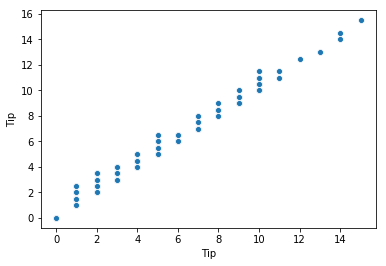

In [23]:
import seaborn as sns
sns.scatterplot(df3["Tip"], df2["Tip"])

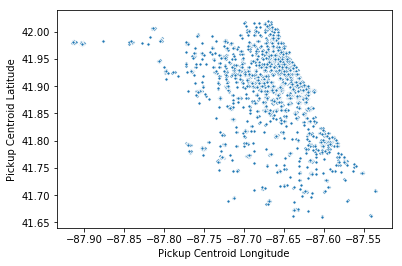

In [24]:
sns.scatterplot(df2["Pickup Centroid Longitude"], df2["Pickup Centroid Latitude"], s=10)

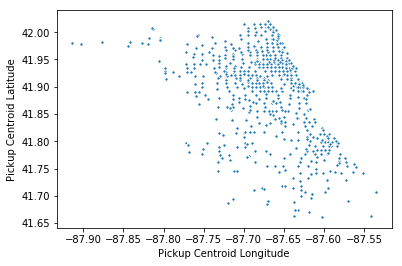

In [25]:
sns.scatterplot(df3["Pickup Centroid Longitude"], df3["Pickup Centroid Latitude"], s=10)

In [26]:
df2.head()

,Trip ID,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Weekday,Hour of Day
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,
2018-11-01 06:30:00,d460b3fe93c2e2aa469eb9ca8241ca248b87a2b2,2018-11-01 07:30:00,2929.0,16.1,50.0,32.0,10.21,0.0,3.0,13.21,True,3,41.715158,-87.593689,41.880536,-87.632818,2018,11,Thursday,6
2018-11-01 07:00:00,89e57c5ac62acf2030f15511479634f1e8f4fd16,2018-11-01 07:45:00,3133.0,22.9,5.0,NaN,35.19,0.0,2.5,37.69,False,1,41.944886,-87.685607,NaN,NaN,2018,11,Thursday,7
2018-11-01 07:30:00,e893d75b0e82e17d23836ef05f04d12746132202,2018-11-01 08:15:00,2102.0,9.3,3.0,28.0,21.14,0.0,3.0,24.14,False,1,41.973026,-87.663054,41.885355,-87.641350,2018,11,Thursday,7
2018-11-01 08:30:00,a0682137da78e3307d8bd758c4393f6ed42483c2,2018-11-01 08:30:00,428.0,1.4,20.0,15.0,7.67,0.0,0.0,7.67,True,1,41.923411,-87.735713,41.953206,-87.763919,2018,11,Thursday,8
2018-11-01 08:30:00,0e453764990aaed6cce66c74b24c2f90b6528aa9,2018-11-01 08:45:00,575.0,1.1,8.0,32.0,5.62,0.0,3.5,9.12,False,1,41.891267,-87.616544,41.881777,-87.633313,2018,11,Thursday,8


In [27]:
df2.to_csv('rideshare_random5k.csv')

In [ ]:
# Valid color palettes for seaborn
#Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, 
#Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
#Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, 
#RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
#Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, 
#autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
#copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, 
#gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, 
#gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, 
#magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, 
#rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, 
#tab20b_r, tab20c, tab20c_r, terrain, terrain_r...
